In [ ]:
# How much is wind power at a particular location ?
# Station Name : OAK PARK
# Wind speed is analysed by hourly basic 

C:\Users\sarab\AppData\Local\Temp\ipykernel_23440\381226298.py:15: DtypeWarning: Columns (2,4,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, skiprows=17)  # Skip the first 17 rows of metadata
C:\Users\sarab\AppData\Local\Temp\ipykernel_23440\381226298.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
C:\Users\sarab\AppData\Local\Temp\ipykernel_23440\381226298.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['date'] = pd.to_datetime(data_clea

Missing values in dataset:
irain     0
rain      0
itemp     0
temp      0
iwetb     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
iwsdp     0
wdsp      0
iwddir    0
wddir     0
dtype: int64
Summary Statistics:
          irain           rain     itemp           temp     iwetb  \
count  184522.0  184522.000000  184522.0  184522.000000  184522.0   
mean        0.0       0.097116       0.0      10.145199       0.0   
std         0.0       0.426817       0.0       5.291204       0.0   
min         0.0       0.000000       0.0     -12.400000       0.0   
25%         0.0       0.000000       0.0       6.500000       0.0   
50%         0.0       0.000000       0.0      10.200000       0.0   
75%         0.0       0.000000       0.0      13.900000       0.0   
max         0.0      17.800000       0.0      31.200000       0.0   

                wetb          dewpt          vappr           rhum  \
count  184522.000000  184522.000000  184522.000000  184522.000000   
mean        

C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


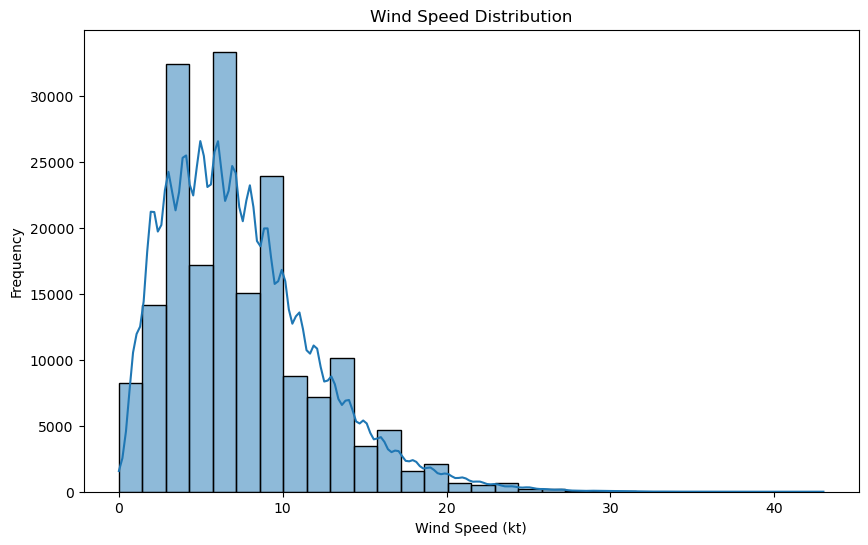

In [37]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# load data 
# from file name 
file_path = 'C:/Users/sarab/hly375.csv'
data = pd.read_csv(file_path, skiprows=17)  # Skip the first 17 rows of metadata

#print(data)

# Rename columns to match the dataset's ddescription 
data.columns = ['date', 'irain', 'rain', 'itemp', 'temp', 'iwetb', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'iwsdp', 'wdsp', 'iwddir', 'wddir']


# Apply column-wise filtering based on indicators
# Rainfall: Keep rows where irain is between 0 and 6, drop rain values where irain == -1
data.loc[data['irain'] == -1, 'rain'] = None


# Temperature: Drop temp values where itemp == 4
data.loc[data['itemp'] == 4, 'temp'] = None

# Wet Bulb: Drop wetb values where iwetb == 4
data.loc[data['iwetb'] == 4, 'wetb'] = None

# Wind Speed: Drop wdsp values where iwsdp == 7
data.loc[data['iwsdp'] == 7, 'wdsp'] = None

# Wind Direction: Drop wddir values where iwddir == 7
data.loc[data['iwddir'] == 7, 'wddir'] = None


# Drop rows with missing values in any critical columns
data_cleaned = data.dropna(subset=['rain', 'temp', 'wetb', 'wdsp', 'wddir'])

# Convert date column to datetime format
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['date'])


# Set the 'date' column as the index for time series analysis
data_cleaned.set_index('date', inplace=True)


# Store valid data in a database
conn = sqlite3.connect("weather_data.db")
data_cleaned.to_sql("weather", conn, if_exists="replace", index=False)


# Step 1: Data Cleaning 
# Check for missing values
print("Missing values in dataset:")
print(data_cleaned.isnull().sum())


# Ensure all numerical columns are properly converted to numeric
data_cleaned[['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp']] = data_cleaned[['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp']].apply(pd.to_numeric, errors='coerce')
data_cleaned = data_cleaned.dropna()


# Step 2: Descriptive Statistics
# Summary statistics
print("Summary Statistics:")
print(data_cleaned.describe())

# Step 3: Data Visualization
# Plot wind speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['wdsp'], bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (kt)')
plt.ylabel('Frequency')
plt.show()

# Close database connection
conn.close()



Plot - Analysis of the Wind Speed Distribution:

This histogram with a kernel density estimation (KDE) overlay provides insights into the frequency distribution of wind speeds (wdsp) in the dataset.

Skewed Distribution:

The wind speed distribution is right-skewed, meaning most values are concentrated at lower speeds, and there is a gradual decline as wind speed increases.

Dominant Range:

The majority of wind speeds are between 3 and 12 kt, with a peak around 6–7 kt, as indicated by the tallest bars.

Turbine Operational Range:

If the assumed wind turbine operational range is 3 to 25 kt, the bulk of the data lies within this range, making the location suitable for wind energy generation.
The long tail extending beyond 25 kt represents occasional high wind speeds, which might correspond to extreme weather events.
Extreme Wind Speeds:

Wind speeds above 20 kt are rare, indicating that extremely high winds are infrequent.

Key findings:

Wind Energy Potential:

The concentration of wind speeds in the range of 3 to 12 kt suggests that this region has consistent and moderate winds, which are generally favorable for wind turbines.

Turbine Suitability:

Since most wind speeds fall within the operational range of typical turbines (3–25 kt), the location is likely suitable for efficient energy generation.

Extreme Events:

The tail of the distribution shows some occurrences of wind speeds beyond 25 kt, which could indicate storms or extreme weather. These events may necessitate consideration for turbine design and maintenance.

In [ ]:
# Relation between key weather metrics - Air Temperature(temp), Wet Bulb Temperature(wetb), Dew Point Temperature(dewpt), 
# Relative Humidity(rhum), Mean Wind Speed(wdsp), Precipitation Amount(rain)

C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

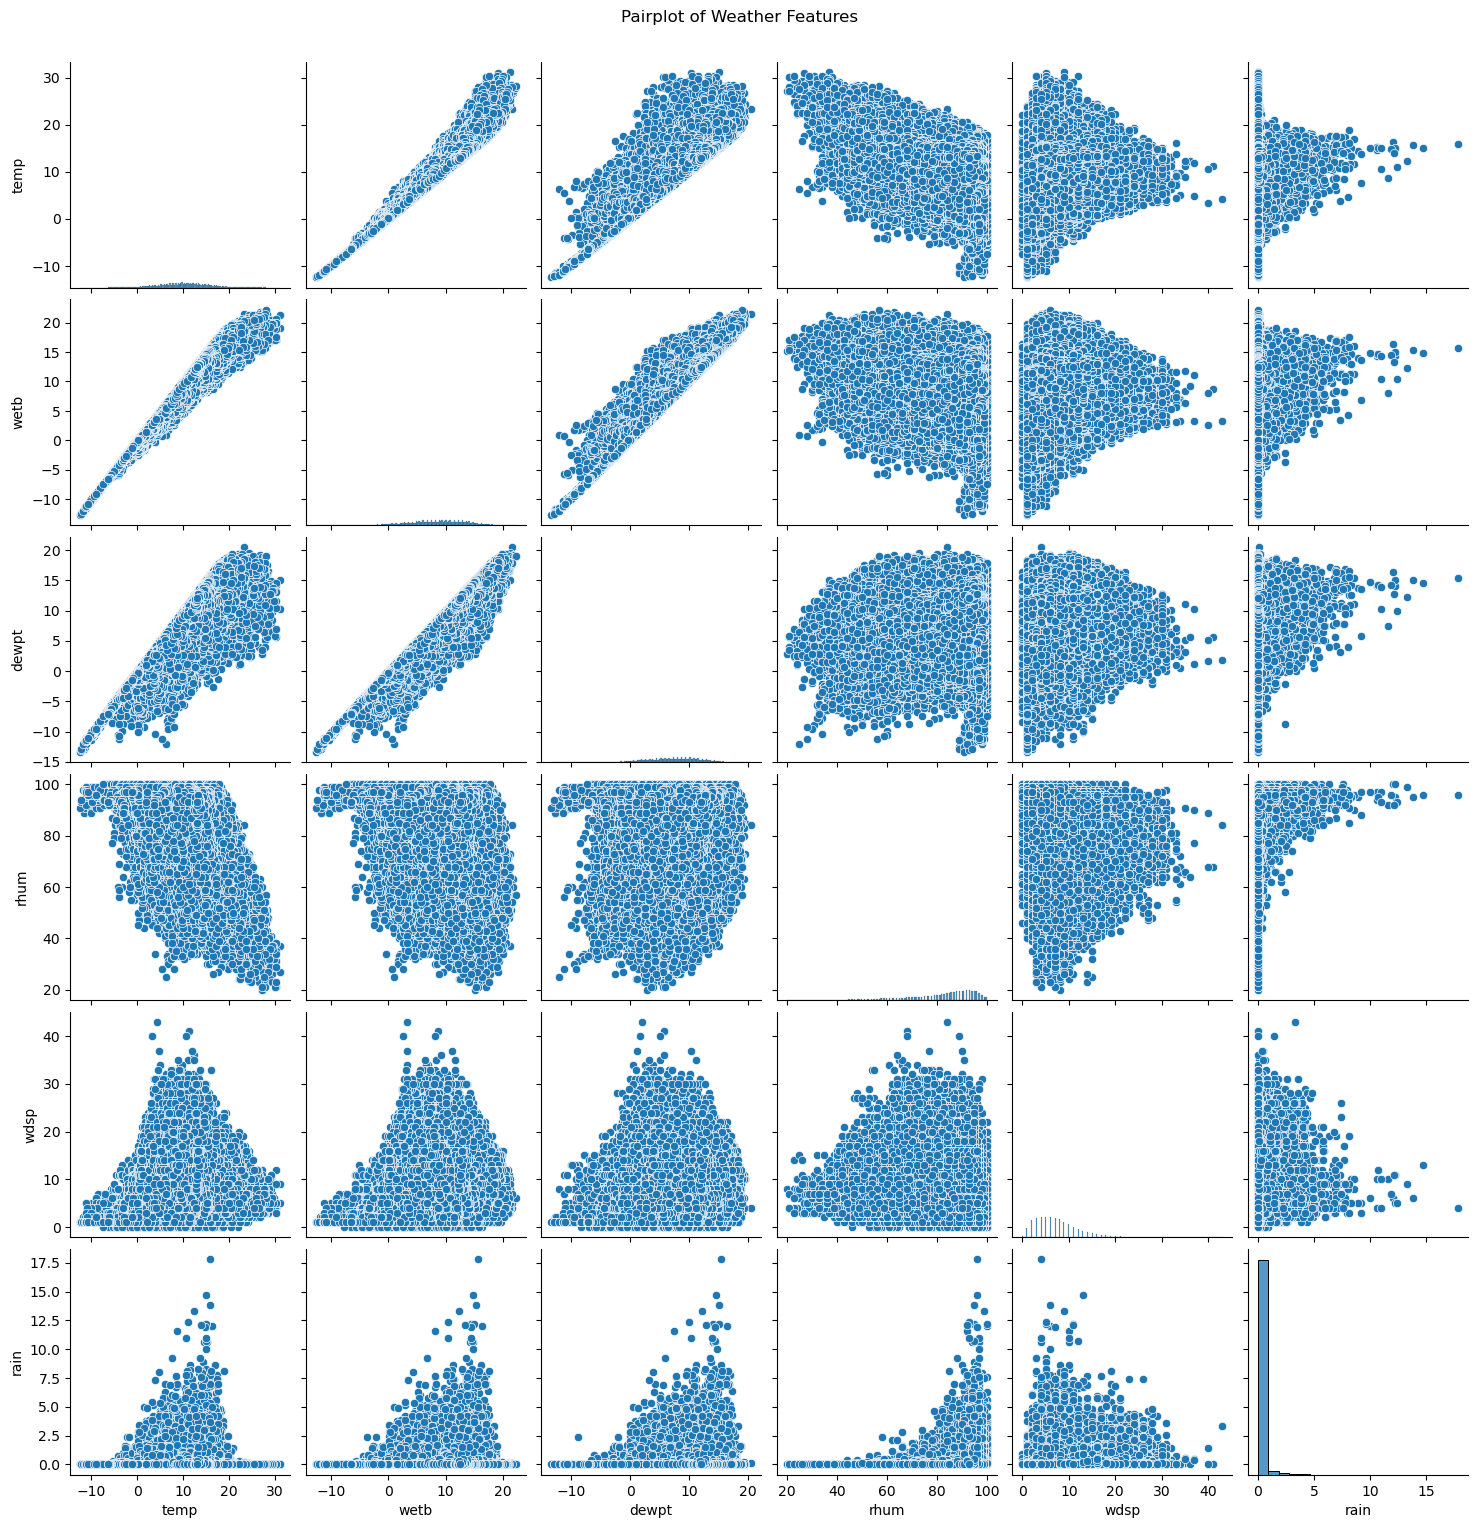

In [38]:
# Pairplot of key variables
sns.pairplot(data_cleaned[['temp', 'wetb', 'dewpt', 'rhum', 'wdsp','rain']])
plt.suptitle('Pairplot of Weather Features', y=1.02)
plt.show()

In [ ]:
I) Diagonal Plots (Histograms):

(1) rain (Rainfall): The histogram indicates a right-skewed distribution, with most rainfall values concentrated around lower values.

(2) temp (Temperature): Temperature shows a broader, more uniform distribution, suggesting significant seasonal variation.

(3) wetb (Wet Bulb Temperature): The wet bulb temperature distribution appears narrower and centered, with fewer extremes compared to temp.

(4) wdsp (Wind Speed): Wind speed values are mostly concentrated within a lower range, with some outliers at higher speeds.

II) Off-Diagonal Scatter Plots (Relationships):

(1) temp vs. dewpt (Temperature vs. DewrPoint Temperature): A strong positive linear relationship is visible.

(2) temp vs. rhum (Temperature vs. Relative Humidity): An inverse relationship is evident: as temperature increases, relative humidity tends to decrease.

(3) rain vs. wdsp (Rainfall vs. Wind Speed): A weak or no significant correlation is visible. Rainfall does not seem to be strongly influenced by wind speed in this dataset.

(4) wdsp vs. rhum (Wind Speed vs. Relative Humidity): Scatter points are widely dispersed, indicating no direct relationship between wind speed and relative humidity.

III)
 Key Relationships: (1) Positive Correlations: temp and dewpt: Strong linear correlation. dewpt and rhum: Indirectly related through temperature dynamics.

(2) Weak or No Correlations: rain with temp, wdsp, and other variables: Rainfall seems largely independent in this dataset. wdsp with other variables: Wind speed shows weak or no correlation with the other weather metrics.

(3) Inverse Relationships: temp and rhum: Indicates the atmospheric trend where warm air reduces relative humidity.

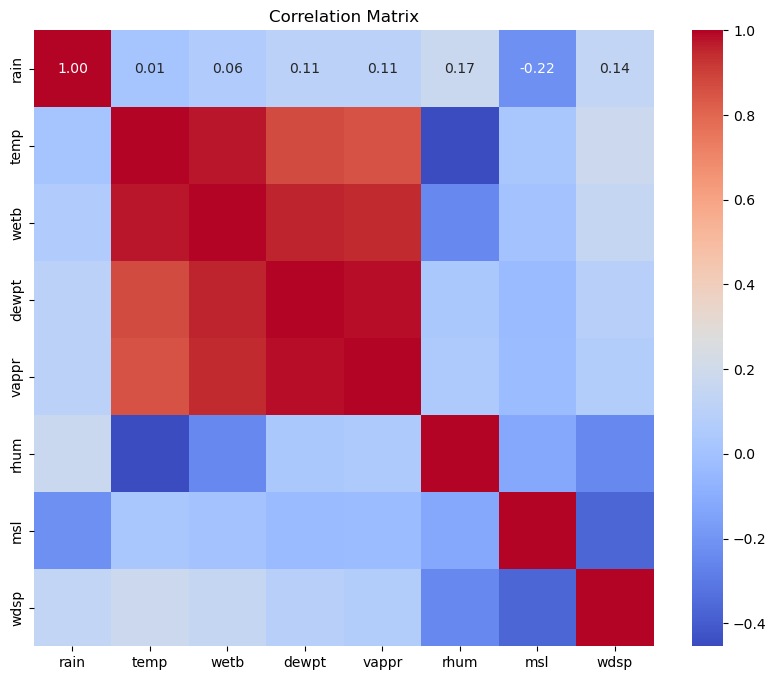

In [39]:
# Correlation matrix
correlation_matrix = data_cleaned[['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1) Strong Positive Correlations:
   
 temp (Temperature) and dewpt (Dew Point Temperature):
 Correlation: ~0.97
 A very strong positive relationship.

 rhum (Relative Humidity) and dewpt:
 Correlation: ~0.84
 High relative humidity corresponds to higher dew point values.

 rhum and vappr (Vapor Pressure):
 Correlation: ~0.87
 Vapor pressure is strongly tied to humidity, reflecting the amount of moisture in the air.

2) Moderate Negative Correlations:
   
 rhum and temp:
 Correlation: ~-0.45
 As temperature increases, relative humidity decreases. This is a common atmospheric trend, as warm air can hold more moisture, reducing   relative humidity.

 msl (Mean Sea Level Pressure) and rain:
 Correlation: ~-0.22
 A weak negative relationship indicates that higher sea-level pressures might be associated with less rainfall.

3) Weak or No Correlation:
   
 rain and wdsp (Wind Speed):
 Correlation: ~0.14
 No significant relationship between rainfall and wind speed, as they are likely influenced by different weather conditions.

 rain and temp:
 Correlation: ~0.01
 Rainfall and temperature do not appear to be directly related in this dataset.

 wdsp (Wind Speed) and Most Variables:
 Correlations with other variables are close to zero, indicating little to no direct linear relationship

In [ ]:
# analysis of wind power

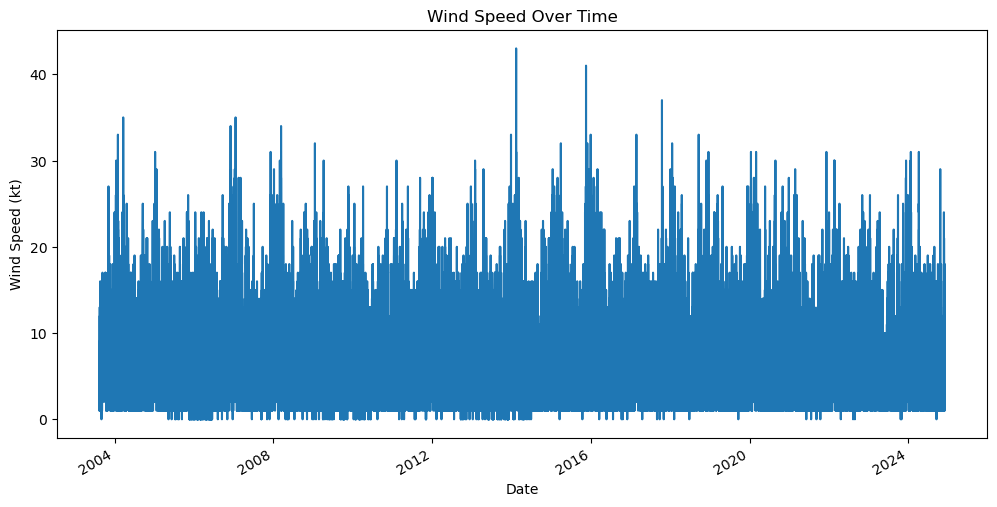

In [40]:
# Time Series Analysis of Wind Speed
plt.figure(figsize=(12, 6))
data_cleaned['wdsp'].plot()
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (kt)')
plt.show()

Plot - Wind Speed Over Time:

This plot shows the variation of wind speed (wdsp) over the entire recorded time period.

There are significant fluctuations in wind speed, with occasional sharp spikes representing higher wind speeds. The majority of the values are concentrated within a moderate ranse, suggesting consistent wind conditions for most of the time. No obvious long-term trend (e.g., increasing or decreasing wind speeds) is visible.



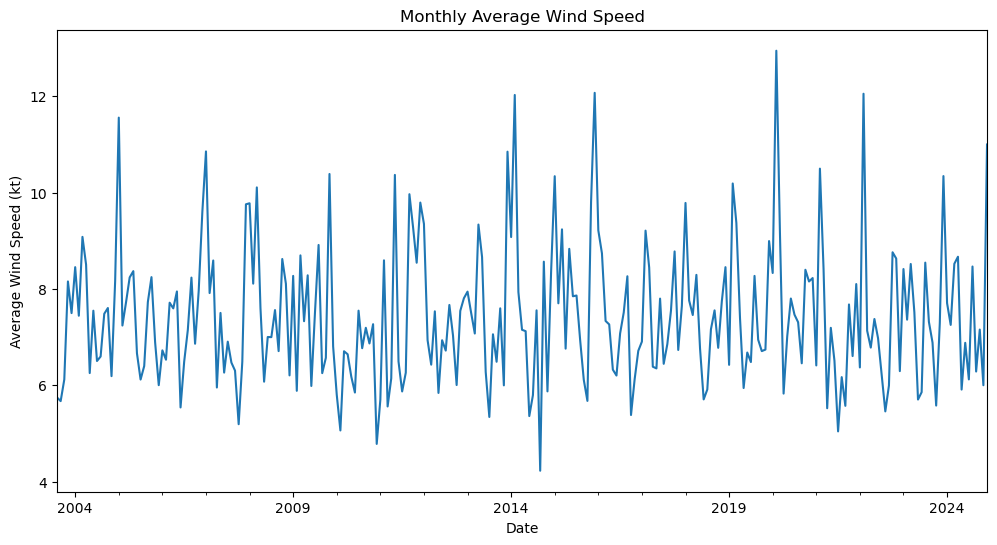

In [41]:
# Monthly Average Wind Speed
monthly_avg = data_cleaned['wdsp'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Monthly Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Average Wind Speed (kt)')
plt.show()

Plot - Monthly Average Wind Speed:

This plot shows the monthly average wind speed, helping to smooth out daily fluctuations for better trend analysis.

The monthly averages exhibit clear periodic fluctuations, indicating potential seasonal effects on wind speed.
Peaks and troughs recur over time, suggesting regular wind speed patterns that align with specific months or seasons.
While the overall wind speed appears consistent over the years, specific years may have slightly higher or lower wind speed averages.

In [42]:
# Step 4: Wind Power Analysis
# Wind turbine operational range (assumed: 3 kt to 25 kt)
operational_range = (data_cleaned['wdsp'] >= 3) & (data_cleaned['wdsp'] <= 25)
data_cleaned['operational'] = operational_range

# Percentage of operational time
operational_percentage = data_cleaned['operational'].mean() * 100
print(f"Percentage of time wind speeds are within operational range: {operational_percentage:.2f}%")

Percentage of time wind speeds are within operational range: 87.65%


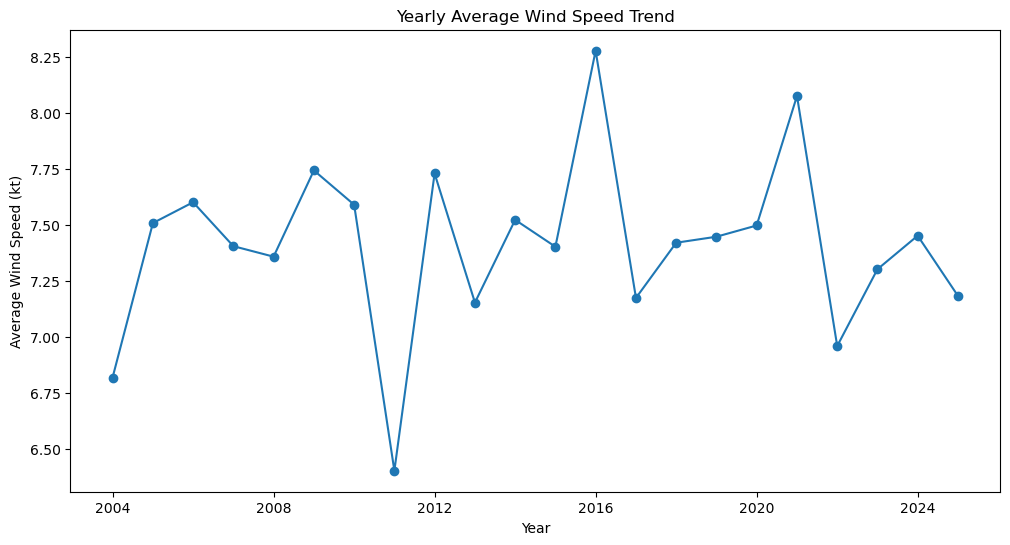

In [43]:
# Step 5: Trend Analysis and Prediction
# Calculate yearly averages
yearly_avg = data_cleaned['wdsp'].resample('Y').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg, marker='o')
plt.title('Yearly Average Wind Speed Trend')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (kt)')
plt.show()

Plot - Analysis of the Yearly Average Wind Speed Trend:

This plot visualizes the yearly average wind speed over the observed time period.

The yearly average wind speed shows considerable fluctuations, with noticeable peaks and troughs across the years. A significant drop in 2012 suggests an anomalously low wind year. 2016 exhibits a prominent peak, indicating a year with consistently higher wind speeds. Overall Range:

Wind speed averages vary between approximately 6.5 kt (minimum) and 8.5 kt (maximum) over the years. This range suggests moderate variability in wind conditions year-to-year.

The plot does not show a consistent upward or downwaro trend over the years, suggesting relatively stable long-term wind speed averages. This stability may indicate reliable wind conditions for wind energy generation.

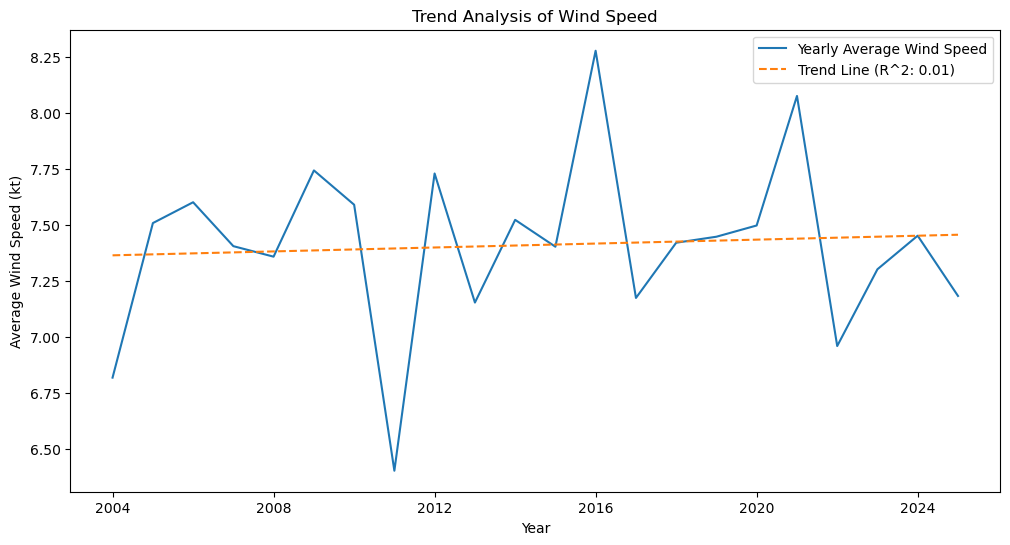

In [44]:
# Fit a linear regression model for trend prediction
x = np.arange(len(yearly_avg)).reshape(-1, 1)
y = yearly_avg.values
model = LinearRegression()
model.fit(x, y)
trend_line = model.predict(x)

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, y, label='Yearly Average Wind Speed')
plt.plot(yearly_avg.index, trend_line, label=f'Trend Line (R^2: {r2_score(y, trend_line):.2f})', linestyle='--')
plt.title('Trend Analysis of Wind Speed')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (kt)')
plt.legend()
plt.show()

conn.close()

Plot - Analysis of the Trend Analysis of Wind Speed This plot shows the yearly average wind speed over time and the linear trend line fitted to the data.

Yearly Wind Speed Averages:

The yearly average wind speed fluctuates significantly across the observed years. Prominent spikes are visible in 2016 and 2020, suggesting years with higher wind activity. There are also dips, such as in 2012 and 2022, indicating years with relatively lower average wind speeds.

Trend Line:

The dashed orange line represents the linear trend line fitted to the data. The slope of the line is slightly positive, indicating a minor upward trend in wind speeds over the years. The R² value (R^2: 0.01) is very low, meaning the trend line explains only 1% of the variance in the data.

Stability Over Time:

The minimal slope of the trend line and low R² value indicate that wind speeds have remained relatively stable over the years, with no significant increase or decrease.

Impact on Wind Energy:

The stability of wind speeds over eime is favorable for wind energy generation, as it indicates consistent wind conditions for turbine operation.

In [ ]:
# prediction wind speed 10 years into future

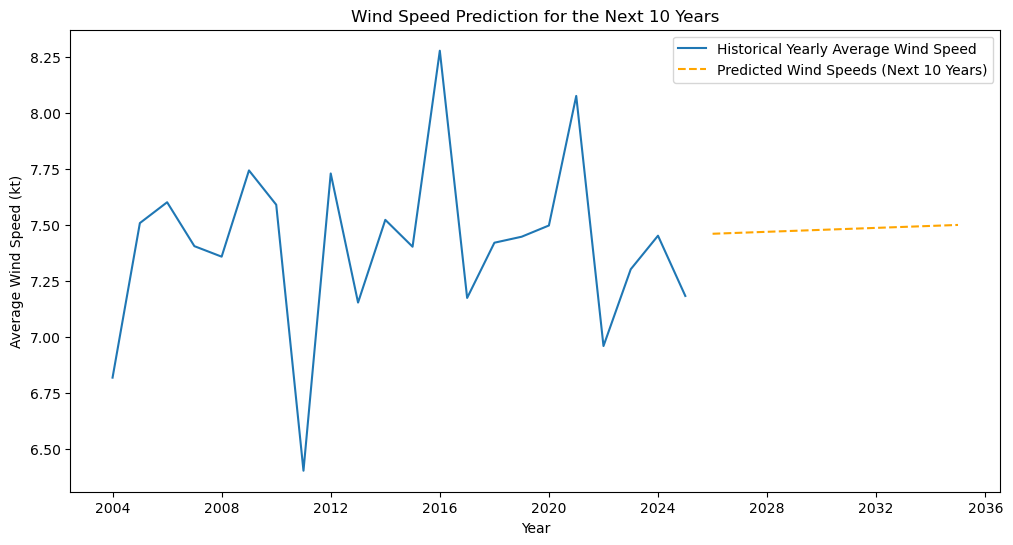

In [46]:
future_years = np.arange(len(yearly_avg), len(yearly_avg) + 10).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot future predictions
future_index = pd.date_range(start=yearly_avg.index[-1] + pd.offsets.YearBegin(), periods=10, freq='Y')
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, y, label='Historical Yearly Average Wind Speed')
plt.plot(future_index, future_predictions, label='Predicted Wind Speeds (Next 10 Years)', linestyle='--', color='orange')
plt.title('Wind Speed Prediction for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (kt)')
plt.legend()
plt.show()

Plot - Analysis of the Wind Speed Prediction for the Next 10 Years:

This plot shows historical yearly average wind speeds alongside predicted values for the next decade based on a linear regression model.

Historical Wind Speed (2004–2024):

The historical wind speeds exhibit fluctuations, with notable peaks (e.g., around 2016) and dips (e.g., 2012 and 2022). There is no strong, consistent trend in the historical data, as the variations appear random.

Predicted Wind Speeds (2025–2035):

The dashed orange line represents the predicted wind speeds for the next 10 years based on the linear regression model. The prediction shows a very slight upward trend, indicating teat average wind speeds are expected to increase marginally over the next decade.

Stability of 

The predicted values are close to the historical average, reflecting the stability of wind speed trends in the dataset.

Marginal Increase:

The slight upward trend in predictions suggests a minimal increase in average wind speeds over time. This is consistent with the earlier observation of a low R² value (~0.01), meaning the trend is statistically insignificant.

Wind Energy Feasibility:

The stability in predicted wind speeds is promising for wind energy projects, as it indicates consistent wind conditions over the next decade.Predictions:

In [ ]:
# compare trends of other metrics with wind speed

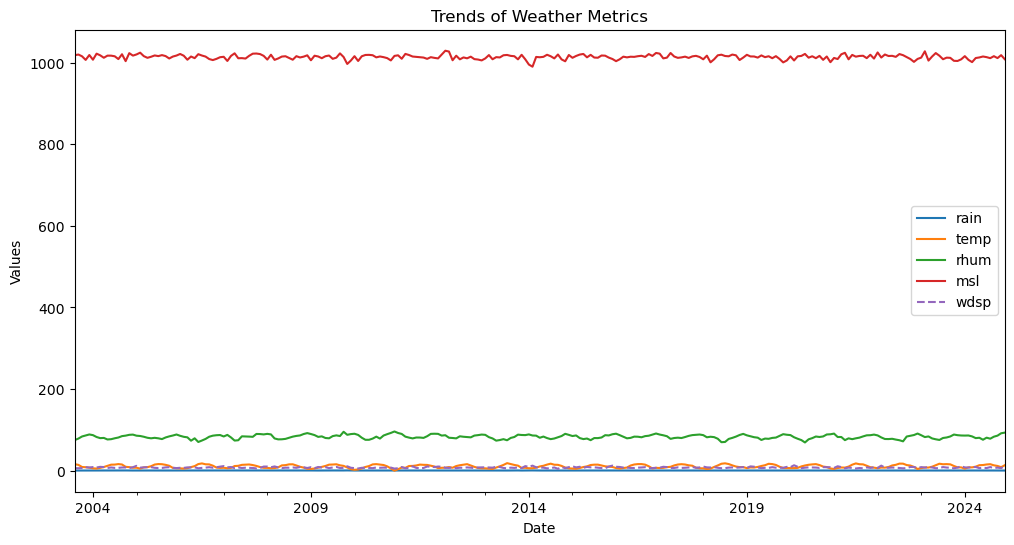

Correlation of wind speed with other metrics:
wdsp    1.000000
rain    0.138416
temp    0.180784
rhum   -0.244912
msl    -0.367969
Name: wdsp, dtype: float64


In [47]:
metrics_to_analyze = ['rain', 'temp', 'rhum', 'msl']
plt.figure(figsize=(12, 6))
for metric in metrics_to_analyze:
    data_cleaned[metric].resample('M').mean().plot(label=metric)
data_cleaned['wdsp'].resample('M').mean().plot(label='wdsp', linestyle='--')
plt.title('Trends of Weather Metrics')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Correlation analysis
print("Correlation of wind speed with other metrics:")
correlations = data_cleaned[['wdsp', 'rain', 'temp', 'rhum', 'msl']].corr()
print(correlations['wdsp'])

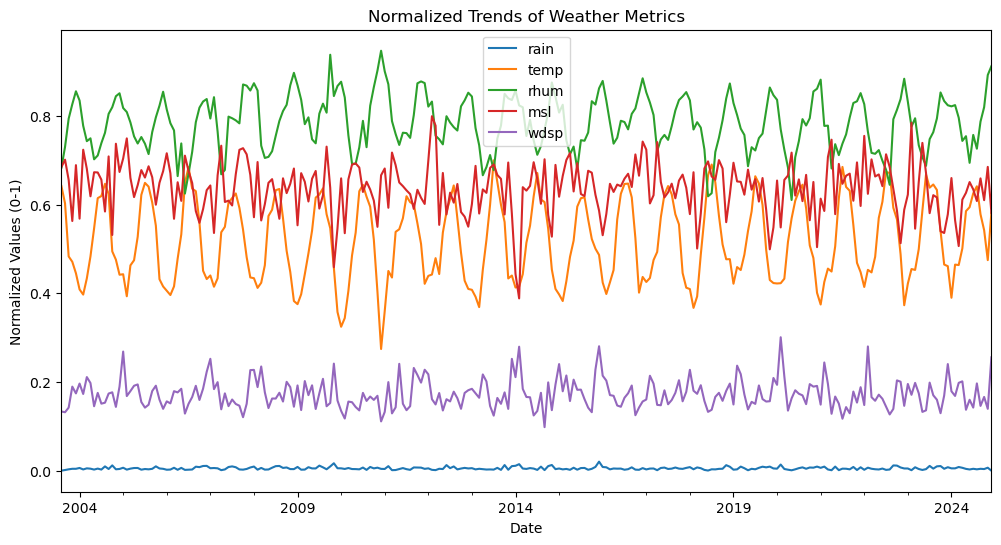

In [48]:
# Normalize the metrics to a 0-1 range for better visibility
metrics_to_analyze = ['rain', 'temp', 'rhum', 'msl', 'wdsp']
normalized_data = data_cleaned[metrics_to_analyze].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot the normalized metrics
plt.figure(figsize=(12, 6))
for metric in metrics_to_analyze:
    normalized_data[metric].resample('M').mean().plot(label=metric)
plt.title('Normalized Trends of Weather Metrics')
plt.xlabel('Date')
plt.ylabel('Normalized Values (0-1)')
plt.legend()
plt.show()

Plot - Analysis of the Normalized Trends of Weather Metrics:

temp (Temperature):

Clear cyclical patterns are visible, representing sealonal variations (e.g., higher temperatures in summer and lower temperatures in winter). The peaks and troughs repeat consistently over time, indicating stable seasonal behavior.

rhum (Relative Humidity):

Also shows cyclical patterns, but with an inverse relationship to temperature. Humidity tends to peak during cooler months and decrease during warmer months.

msl (Mean Sea Level Pressure):

Appears relatively stable with only minor fluctuations over time. No noticeable seasonal or long-term trend is evident.

wdsp (Wind Speed):

Wind speed shows moderate fluctuations with no clear cyclical trend. The variability in wind speed may be linked to weather events or atmospheric disturbances.

rain (Rainfall):

Rainfall has low values compared to the other metrics, and its pattern appears irregular, with occasional spikes. No clear seasonality or long-term trend is visible.

References:

1) Met Éireann. (n.d.). Historical Weather Data. Retrieved December 28, 2024, from https://www.met.ie/climate/available-data/historical-data

2) Reuters. (2024, October 24). Global wind power set to grab record share of electricity market. Retrieved December 28, 2024, from https://www.reuters.com/business/energy/global-wind-power-set-grab-record-share-electricity-market-maguire-2024-10-24/

3) The Scottish Sun. (2023). World’s largest floating wind turbine “Flying V” that can withstand hurricanes & is as heavy as 1,000 buses revealed. Retrieved December 28, 2024, from https://www.thescottishsun.co.uk/tech/13180529/worlds-largest-floating-wind-turbine-flying-v/

4) Reuters. (2024, August 22). Germany's top clean energy source set to slow growth pace in 2024. Retrieved December 28, 2024, from https://www.reuters.com/business/energy/germanys-top-clean-energy-source-set-slow-growth-pace-2024-maguire-2024-08-22/

5) Pryor, S. C., & Barthelmie, R. J. (2023). Climate change impacts on offshore wind energy: A global review. Renewable and Sustainable Energy Reviews, 169, 113226. https://doi.org/10.1016/j.rser.2022.113226

6) International Energy Agency (IEA). (2024). Wind energy in 2024: Trends and innovations. Retrieved December 28, 2024, from https://www.iea.org/topics/renewables/wind-energy

7) https://www.w3schools.com/datascience/default.asp 